## pnlphw03

### 2.使用语料库模块处理austen-persuasion.txt。这本书中有多少词标识符？多少词类型？

In [1]:
import nltk

In [5]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [24]:
#词标识符数
len(gutenberg.words('austen-persuasion.txt'))

98171

In [25]:
#词类型数
len(set(gutenberg.words('austen-persuasion.txt')))

6132

### 8.在名字语料库上定义一个条件频率分布，显示哪个首字母在男性名字中比在女性名字中更常用（见图2-7）。
显示A,C,M首字母在男性名字中比在女性名字中更常用

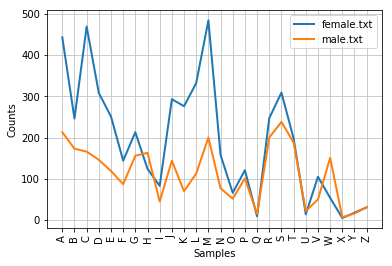

In [37]:
cfd = nltk.ConditionalFreqDist(
    [(fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)])
cfd.plot()

### 9.挑选两个文本，研究它们之间在词汇、词汇丰富性、文体等方面的差异。你能找出几个在这两个文本中词意相当不同的词吗？例如：在《白鲸记》与《理智与情感》中的monstrous。

In [54]:
from nltk.corpus import brown

In [62]:
#文体差异
brown.categories(fileids=['ca01']),brown.categories(fileids=['cb25'])

(['news'], ['editorial'])

In [64]:
#词汇长度
len(brown.words(fileids='ca01')),len(brown.words(fileids='cb25'))

(2242, 2368)

In [65]:
#词汇丰富度
len(brown.words(fileids='ca01'))/len(set(brown.words(fileids='ca01')))

2.643867924528302

In [66]:
#词汇丰富度
len(brown.words(fileids='cb25'))/len(set(brown.words(fileids='cb25')))

2.72183908045977

In [52]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
     (genre, word)
     for genre in brown.categories()
     for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


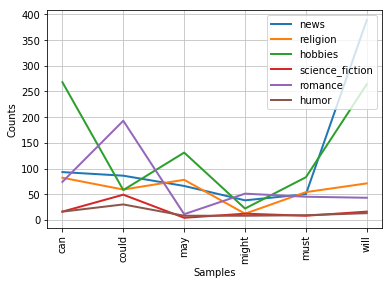

In [53]:
cfd.plot(conditions=genres, samples=modals)

### 15.写一个程序，找出所有在布朗语料库中出现至少3 次的词。

In [67]:
from nltk.corpus import brown

In [75]:
fdist = nltk.FreqDist([w.lower() for w in brown.words()])

In [76]:
count = 0
l = fdist.most_common()[::-1]
for (a,b) in l:
    if b>2:
        break
    count += 1
#至少3 次的词
w = [a for (a,b) in l[count:]]
len(w)

20615

### 17.写一个函数，找出一个文本中最常出现的50 个词，停用词除外。

In [85]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#扩充停用词
ap = [',','.','"',';','."',',"','--','-','!','?"','.--',"'",';--','!--','?']
stopwords.extend(ap)

In [86]:
def most_common_words(text, n):
    content = [w for w in text if w.lower() not in stopwords]
    fdist = nltk.FreqDist(content)
    return(fdist.most_common(n))

In [87]:
#测试
print(most_common_words(nltk.corpus.gutenberg.words('austen-sense.txt'),50))

[('Elinor', 684), ('could', 568), ('Marianne', 566), ('Mrs', 530), ('would', 507), ('said', 397), ('every', 361), ('one', 304), ('much', 287), ('sister', 282), ('must', 279), ('Edward', 262), ('mother', 258), ('Dashwood', 252), ('time', 237), ('know', 230), ('Jennings', 230), ('might', 215), ('Willoughby', 215), ('think', 209), ('Miss', 208), ('though', 204), ('well', 191), ('thing', 185), ('Lucy', 185), ('never', 184), ('soon', 180), ('Mr', 178), ('see', 173), ('Colonel', 173), ('without', 171), ('nothing', 170), ('ever', 169), ('may', 169), ('good', 166), ('John', 163), ('first', 160), ('say', 160), ('house', 159), ('little', 158), ('day', 150), ('great', 149), ('two', 145), ('however', 145), ('Brandon', 144), ('make', 140), ('made', 138), ('sure', 134), ('Ferrars', 129), ('heart', 127)]


## end

## end

## end

## end